# TBOFS

Sea water temperature comparison between the Tampa Bay NOAA OFS model and IOOS ERDDAP Datasets.

In [1]:
import ocean_model_skill_assessor as omsa
from pandas import Timestamp, Timedelta

In [2]:
project_name = "tbofs"
key = "temp"


In [3]:
# Model set up
loc = "https://opendap.co-ops.nos.noaa.gov/thredds/dodsC/TBOFS/fmrc/Aggregated_7_day_TBOFS_Fields_Forecast_best.ncd"
model_name = "model"
kwargs_open = dict(drop_variables="ocean_time")
# can't use chunks or model output won't be read in 

# Data catalog set up
catalog_name = "erddap"
kwargs = dict(server="https://erddap.sensors.ioos.us/erddap", category_search=["standard_name", key])
today = Timestamp.today().date()
kwargs_search = dict(max_lat=28, max_lon=-82, min_lat=27.1, min_lon=-83.2,
                     min_time=str(today - Timedelta("4 days")), max_time=str(today + Timedelta("1 day"))
)


In [4]:
# Make model catalog
cat_model = omsa.make_catalog(project_name=project_name, 
                              catalog_type="local", 
                              catalog_name=model_name, 
                              kwargs=dict(filenames=loc, skip_entry_metadata=True),
                              kwargs_open=kwargs_open,
                              save_cat=True)

[2023-01-27 10:34:12,410] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:379} INFO - Catalog saved to /Users/kthyng/Library/Caches/ocean-model-skill-assessor/tbofs/model.yaml with 1 entries.


In [5]:
# make data catalog
cat_data = omsa.make_catalog(project_name=project_name, 
                             catalog_type="erddap", 
                             catalog_name=catalog_name, 
                             kwargs=kwargs,
                             save_cat=True,
                             kwargs_search=kwargs_search,
                             vocab="standard_names")

[2023-01-27 10:34:16,725] {/Users/kthyng/projects/intake-erddap/intake_erddap/erddap_cat.py:246} WARNING - search https://erddap.sensors.ioos.us/erddap/search/advanced.csv?page=1&itemsPerPage=100000&protocol=tabledap&cdm_data_type=(ANY)&institution=(ANY)&ioos_category=(ANY)&keywords=(ANY)&long_name=(ANY)&standard_name=sea_surface_temperature&variableName=(ANY)&minLon=-83.2&maxLon=-82&minLat=27.1&maxLat=28&minTime=1674432000.0&maxTime=1674864000.0 returned HTTP 404
[2023-01-27 10:34:17,991] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:379} INFO - Catalog saved to /Users/kthyng/Library/Caches/ocean-model-skill-assessor/tbofs/erddap.yaml with 15 entries.


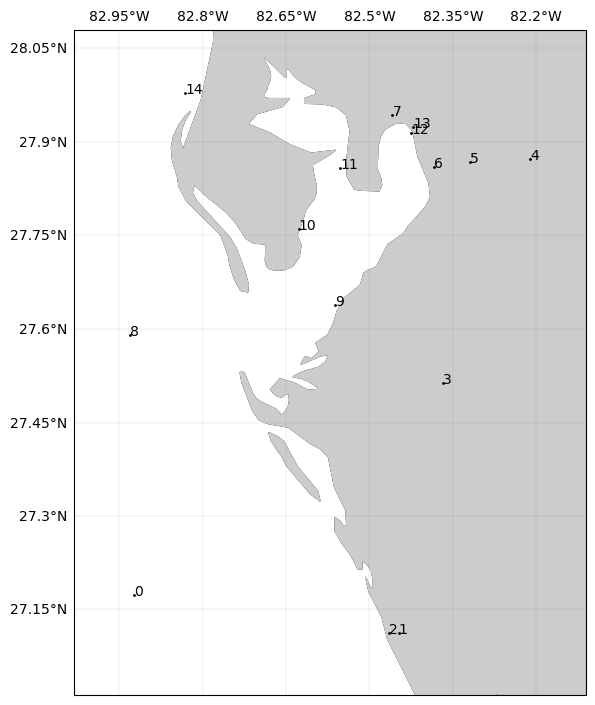

In [6]:
# Plot discovered data locations
omsa.plot.map.plot_cat_on_map(catalog=catalog_name, project_name=project_name)

Image shows a map around Tampa Bay with data locations indicated in black with dots and numeric labels.

[2023-01-27 10:38:16,659] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:448} INFO - Note that we are using 2 datasets of 15 datasets. This might take awhile.


  0%|          | 0/1 [00:00<?, ?it/s]

[2023-01-27 10:38:35,597] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:488} INFO - Catalog <Intake catalog: erddap>.


[2023-01-27 10:38:35,600] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:498} INFO - 
source name: edu_usf_marine_comps_c10 (1 of 2 for catalog <Intake catalog: erddap>.
[2023-01-27 10:38:36,138] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:565} WARNING - Dataset edu_usf_marine_comps_c10 had a timezone UTC which is being removed. Make sure the timezone matches the model output.
[2023-01-27 10:38:38,782] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:686} INFO - Plotted time series for edu_usf_marine_comps_c10
.


[2023-01-27 10:38:38,785] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:498} INFO - 
source name: gov_usgs_waterdata_02299734 (2 of 2 for catalog <Intake catalog: erddap>.
[2023-01-27 10:38:38,797] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:510} WARNING - Dataset gov_usgs_waterdata_02299734 at lon -82.4474111, lat 27.11271944 not located within model domain. Skipping dataset.



2it [00:03,  1.60s/it]
100%|██████████| 1/1 [00:03<00:00,  3.20s/it]


[2023-01-27 10:38:49,236] {/Users/kthyng/projects/ocean-model-skill-assessor/ocean_model_skill_assessor/main.py:699} INFO - Finished analysis. Find plots, stats summaries, and log in /Users/kthyng/Library/Caches/ocean-model-skill-assessor/tbofs.


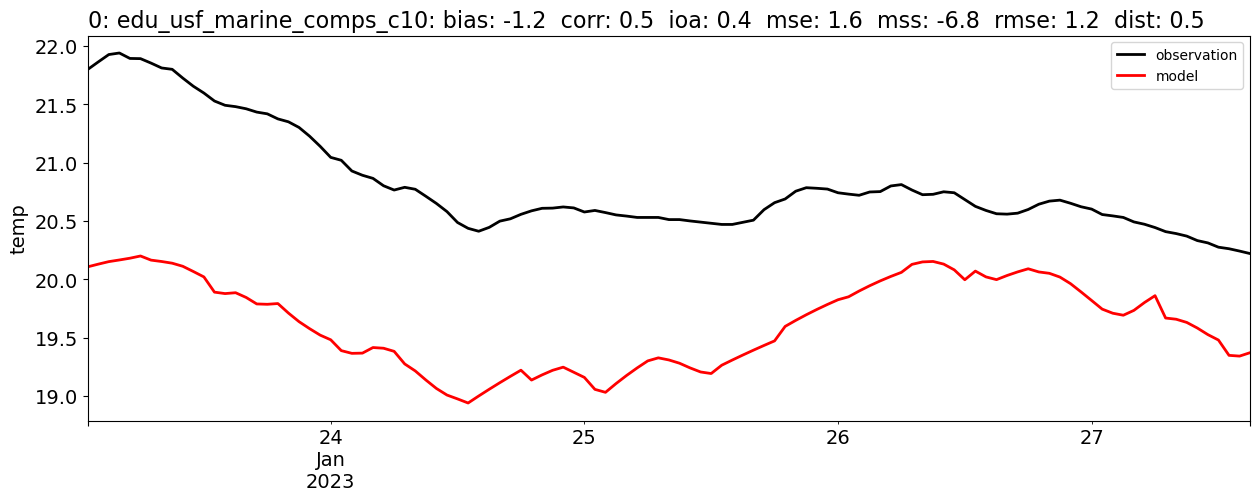

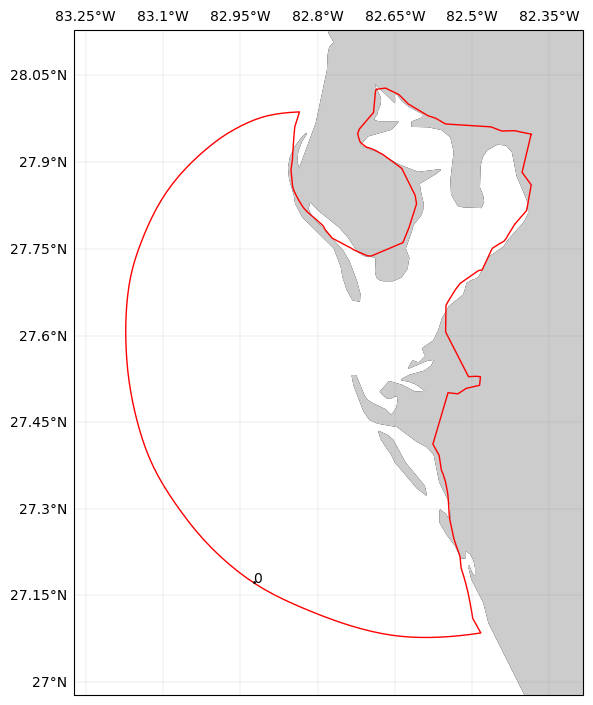

In [8]:
omsa.run(project_name=project_name, catalogs=catalog_name, model_name=model_name,
         vocabs=["general","standard_names"], key_variable=key, alpha=20, ndatasets=2)

The first image shows a time series comparison for station "edu_usf_marine_comps_c10" of temperature values between the data and the model. 

The second image shows a map of the Tampa Bay region with a red outline of the approximate boundary of the numerical model along with a black dot for the data location and the number "0" labeling it.